In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

<Figure size 640x480 with 0 Axes>

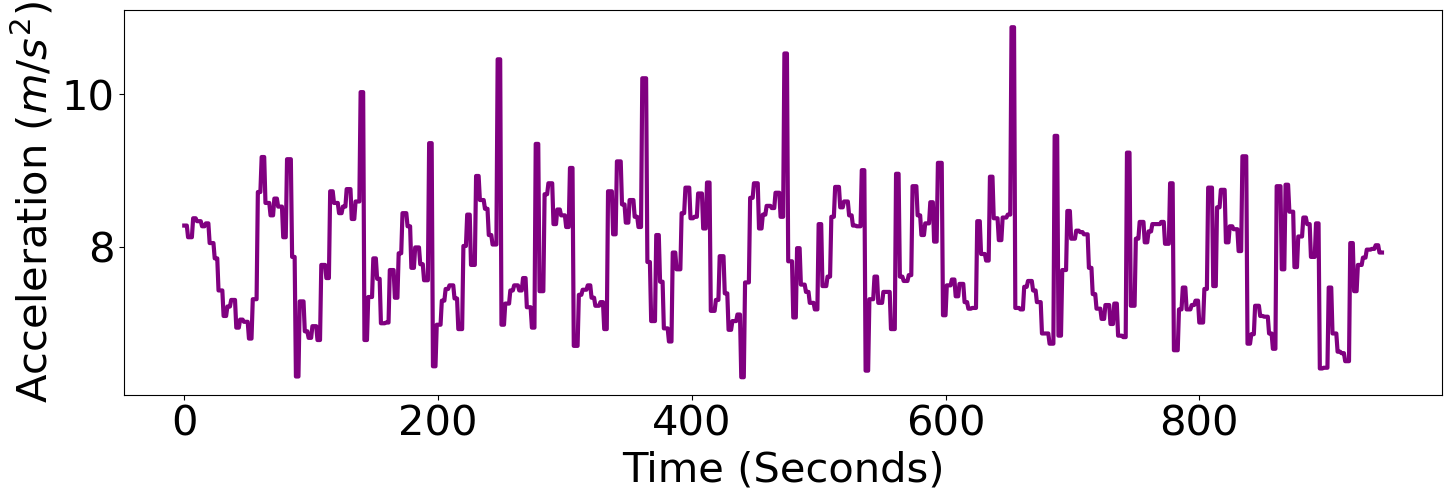

In [22]:
fig = plt.figure()

with open('C:\\Users\\dil-p\\Earring++\\Earring-\\Accel Data\\accel_walkingInPlace.txt', 'r') as file1:
    groupX = []
    groupY = []
    groupZ = []
    for line in file1:
        groupX.append(float(line.split(',')[0]))
        groupY.append(float(line.split(',')[1]))
        groupZ.append(float(line.split(',')[2]))
        '''
        if(line.split('=')[0] == 'RED'):
            groupR.append(float(line.split('=')[1]))
        elif(line.split('=')[0] == 'IR'):
            groupIR.append(float(line.split('=')[1]))
        else:
            groupG.append(float(line.split('=')[1]))'''
plt.rcParams.update({'font.size': 30})
f = plt.figure()
f.set_size_inches(17,5) 
totTime = (len(groupX)*20)/1000
x = np.arange(0,totTime,totTime/len(groupX))
plt.ylabel("Acceleration ($m/s^2$)")
plt.xlabel("Time (Seconds)")
plt.plot(groupX, color = "purple", linewidth = 3)            

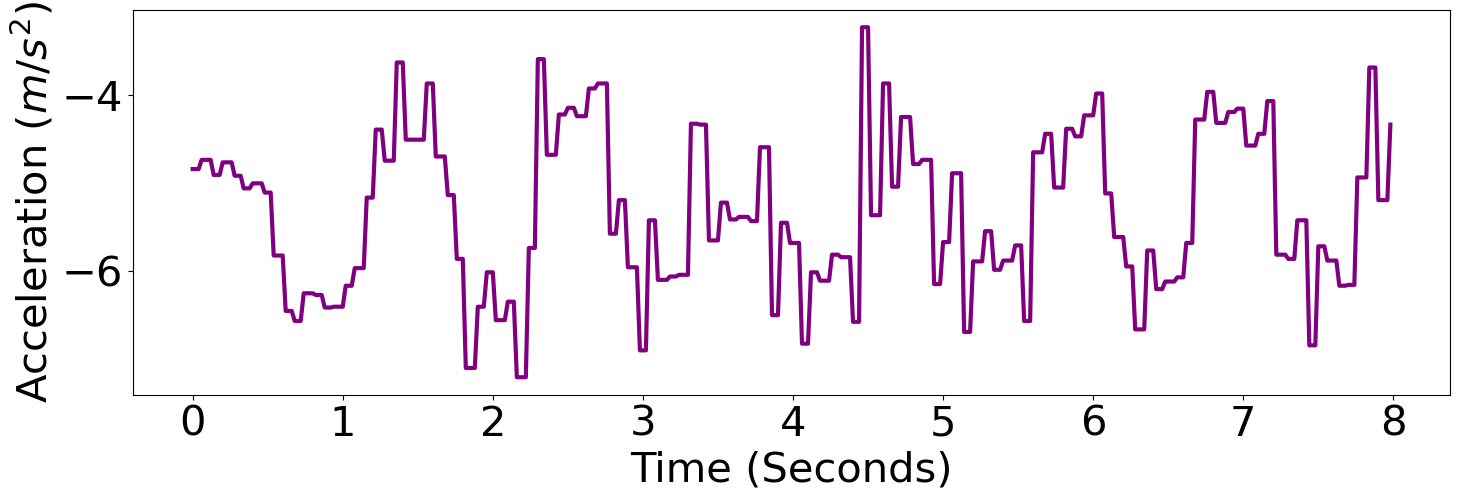

In [16]:
plt.rcParams.update({'font.size': 30})
f = plt.figure()
f.set_size_inches(17,5) 
totTime = (len(groupY)*20)/1000
x = np.arange(0,totTime,totTime/len(groupX))
plt.ylabel("Acceleration ($m/s^2$)")
plt.xlabel("Time (Seconds)")
plt.plot(x[:400],groupY[:400], color = "purple", linewidth = 3)  

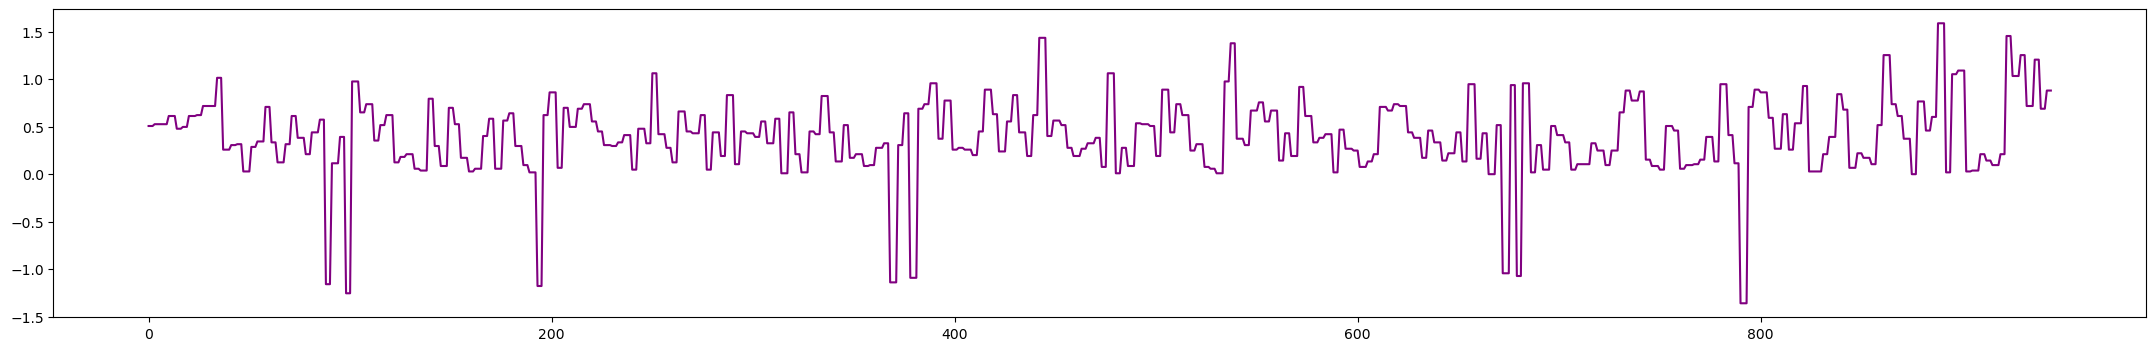

In [8]:
f = plt.figure()
f.set_size_inches(27,4) 
plt.plot(groupZ, color = "purple")

In [ ]:
#calculate heart rate variability & do step counting

16

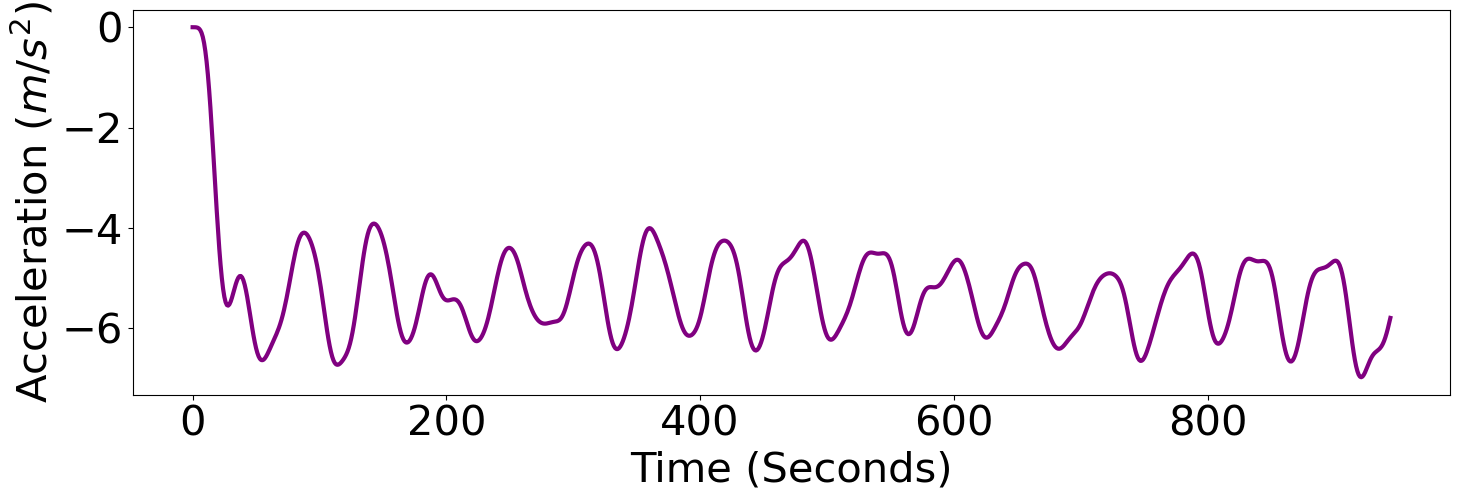

In [25]:
# Step counting:
def butter_lowpass(cutoff, fs, order=5):
    return signal.butter(order, cutoff, fs=fs, btype='low', analog=False)

def butter_lowpass_filter(data, cutoff, fs, order=5):
    b, a = butter_lowpass(cutoff, fs, order=order)
    y = signal.lfilter(b, a, data)
    return y

# Filter requirements:
order = 6
fs = 50       # sample rate, Hz
cutoff = 2

# Calculate filtered signal & find peaks:
groupX_filtered = butter_lowpass_filter(groupY, cutoff, fs, order)
peaks,properties = signal.find_peaks(groupX_filtered, distance = 23)

plt.rcParams.update({'font.size': 30})
f_2 = plt.figure()
f_2.set_size_inches(17,5) 
plt.ylabel("Acceleration ($m/s^2$)")
plt.xlabel("Time (Seconds)")
plt.plot(groupX_filtered, color = "purple", linewidth = 3)
peaks.size